In [1]:
########################################################################
########################################################################
##                                                                    ##
##                      ORIGINAL _ DO NOT PUBLISH                     ##
##                                                                    ##
########################################################################
########################################################################

import torch as tr
import torch
from torch.nn.functional import pad
import torch.nn as nn
import numpy as np
import loader as ld
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


batch_size = 32
output_size = 2
hidden_size = 16        # to experiment with

run_recurrent = False    # else run Token-wise MLP
use_RNN = False          # otherwise GRU
atten_size = 0          # atten > 0 means using restricted self atten

reload_model = False
num_epochs = 10
learning_rate = 0.001
test_interval = 300

# Loading sataset, use toy = True for obtaining a smaller dataset

train_dataset, test_dataset, num_words, input_size = ld.get_data_set(batch_size)

# Special matrix multipication layer (like torch.Linear but can operate on arbitrary sized
# tensors and considers its last two indices as the matrix.)

class MatMul(nn.Module):
    def __init__(self, in_channels, out_channels, use_bias = True):
        super(MatMul, self).__init__()
        self.matrix = torch.nn.Parameter(torch.nn.init.xavier_normal_(torch.empty(in_channels,out_channels)), requires_grad=True)
        if use_bias:
            self.bias = torch.nn.Parameter(torch.zeros(1,1,out_channels), requires_grad=True)

        self.use_bias = use_bias

    def forward(self, x):        
        x = torch.matmul(x,self.matrix) 
        if self.use_bias:
            x = x+ self.bias 
        return x


class ExMLP(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super(ExMLP, self).__init__()

        self.Sigmoid = torch.nn.Sigmoid()

        # Token-wise MLP network weights
        self.layer1 = MatMul(input_size,hidden_size)
        self.layer2 = MatMul(hidden_size,output_size)
        # additional layer(s)
        

    def name(self):
        return "MLP"

    def forward(self, x):

        # Token-wise MLP network implementation
        
        x = self.layer1(x)
        x = self.Sigmoid(x)
        x = self.layer2(x)
        x = self.Sigmoid(x)
        # rest

        return x

# prints portion of the review (20-30 first words), with the sub-scores each work obtained
# prints also the final scores, the softmaxed prediction values and the true label values

def print_review(rev_text, sbs1, sbs2, lbl1, lbl2):
    print(' '.join(rev_text))
    print('word\t\tprediction\tlabel')
    for i in range(len(rev_text)):
        print(f'{rev_text[i]}\t\t{"1" if bool(sbs1[i] > sbs2[i]) else "0"}\t{"1" if bool(lbl1 > lbl2) else "0"}')

# select model to use

/home/orian/PycharmProjects/deepLearning/.venv/lib/python3.10/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/orian/PycharmProjects/deepLearning/.venv/lib/python3.10/site-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/orian/PycharmProjects/deepLearning/.venv/lib/python3.10/site-packages/torchtext

Using model: MLP
Epoch [1/10], Step [300/938], Train Loss: 0.6941, Test Loss: 0.7550
Epoch [1/10], Step [600/938], Train Loss: 0.6879, Test Loss: 0.7044
Epoch [1/10], Step [900/938], Train Loss: 0.6907, Test Loss: 0.6975
Accuracy: 0.5
Epoch [2/10], Step [300/938], Train Loss: 0.6861, Test Loss: 0.6923
Epoch [2/10], Step [600/938], Train Loss: 0.6904, Test Loss: 0.6946
Epoch [2/10], Step [900/938], Train Loss: 0.6799, Test Loss: 0.6927
Accuracy: 0.53125
Epoch [3/10], Step [300/938], Train Loss: 0.6816, Test Loss: 0.6963
Epoch [3/10], Step [600/938], Train Loss: 0.6778, Test Loss: 0.6886
Epoch [3/10], Step [900/938], Train Loss: 0.6785, Test Loss: 0.6916
Accuracy: 0.5104166666666666
Epoch [4/10], Step [300/938], Train Loss: 0.6815, Test Loss: 0.6942
Epoch [4/10], Step [600/938], Train Loss: 0.6679, Test Loss: 0.7004
Epoch [4/10], Step [900/938], Train Loss: 0.6579, Test Loss: 0.6935
Accuracy: 0.4791666666666667
Epoch [5/10], Step [300/938], Train Loss: 0.6644, Test Loss: 0.6860
Epoch [5/

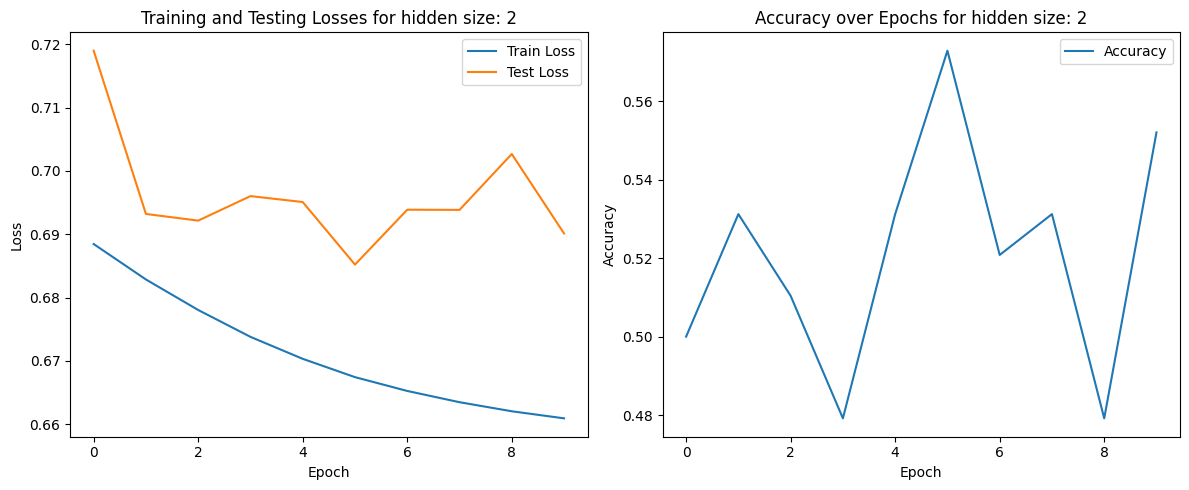

Using model: MLP
Epoch [1/10], Step [300/938], Train Loss: 0.6926, Test Loss: 0.7492
Epoch [1/10], Step [600/938], Train Loss: 0.6885, Test Loss: 0.7077
Epoch [1/10], Step [900/938], Train Loss: 0.6852, Test Loss: 0.6946
Accuracy: 0.5416666666666666
Epoch [2/10], Step [300/938], Train Loss: 0.6922, Test Loss: 0.6907
Epoch [2/10], Step [600/938], Train Loss: 0.6778, Test Loss: 0.6970
Epoch [2/10], Step [900/938], Train Loss: 0.6849, Test Loss: 0.6954
Accuracy: 0.5
Epoch [3/10], Step [300/938], Train Loss: 0.6743, Test Loss: 0.6937
Epoch [3/10], Step [600/938], Train Loss: 0.6695, Test Loss: 0.6833
Epoch [3/10], Step [900/938], Train Loss: 0.6866, Test Loss: 0.6877
Accuracy: 0.5416666666666666
Epoch [4/10], Step [300/938], Train Loss: 0.6692, Test Loss: 0.6888
Epoch [4/10], Step [600/938], Train Loss: 0.6745, Test Loss: 0.6790
Epoch [4/10], Step [900/938], Train Loss: 0.6510, Test Loss: 0.6745
Accuracy: 0.625
Epoch [5/10], Step [300/938], Train Loss: 0.6775, Test Loss: 0.6980
Epoch [5/10

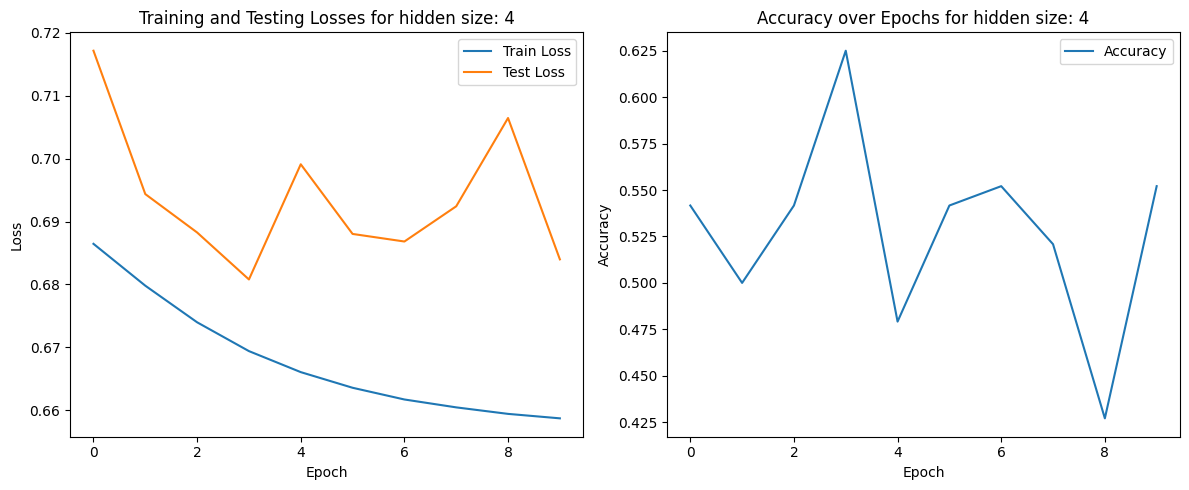

Using model: MLP
Epoch [1/10], Step [300/938], Train Loss: 0.6838, Test Loss: 0.7523
i enjoyed the prequels and found the relationship between tucker and chan previously hilarious rh however was re hash of the first two without the charm or humor think may have laughed once and it was during the ngs tucker was exceedingly annoying in this film and his character didn seem to have any purpose other than to bungle everything up in the most irritating way possible chan is always likable but he seemed tired in this film was able to predict everything who the villain was who the girl was spoiler alert who the good guy turned bad guy
word		prediction	label
i		0	0
enjoyed		1	0
the		1	0
prequels		0	0
and		0	0
found		0	0
the		0	0
relationship		1	0
between		0	0
tucker		0	0
and		0	0
chan		1	0
previously		0	0
hilarious		0	0
rh		1	0
however		0	0
was		0	0
re		1	0
hash		1	0
of		0	0
the		0	0
first		0	0
two		1	0
without		1	0
the		1	0
charm		0	0
or		0	0
humor		0	0
think		0	0
may		0	0
have		0	0
laughed		0

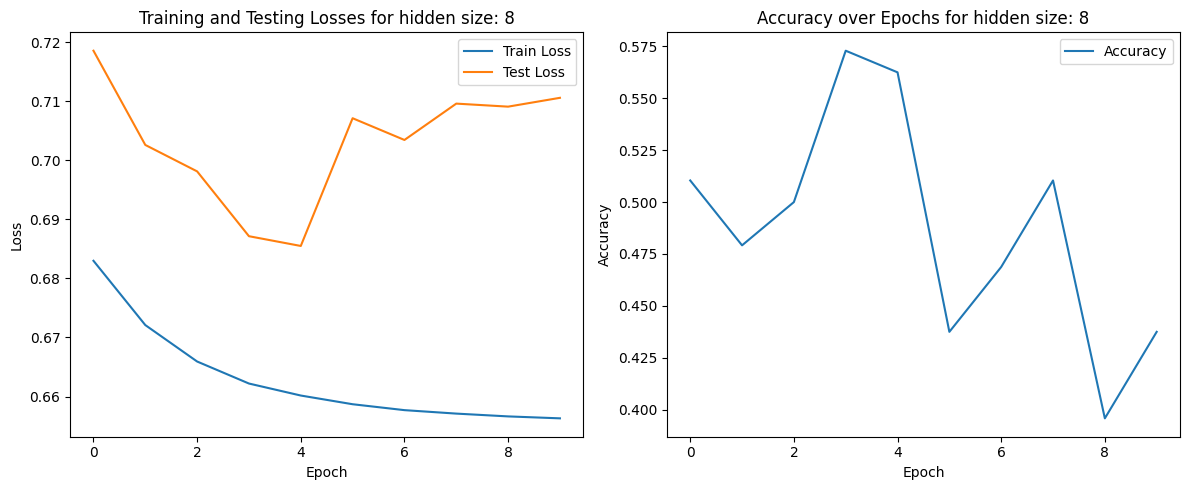

Using model: MLP
Epoch [1/10], Step [300/938], Train Loss: 0.6838, Test Loss: 0.7520
after hearing the word of mouth of just how bad this film is took the plunge and bought the dvd that said everything previously mentioned about this film is true for film that claimed to have budget in the millions it just does not show on the screen at all the list of problems with the film could drag on forever chief amongst them is the film is simply too long it dragged on for few minutes short of hours nearly an hour probably could have been cut off the run time had the editor simply removed the overabundance of
word		prediction	label
after		1	0
hearing		1	0
the		1	0
word		1	0
of		1	0
mouth		0	0
of		1	0
just		1	0
how		1	0
bad		1	0
this		0	0
film		1	0
is		0	0
took		0	0
the		0	0
plunge		0	0
and		0	0
bought		1	0
the		0	0
dvd		1	0
that		1	0
said		0	0
everything		1	0
previously		0	0
mentioned		1	0
about		1	0
this		1	0
film		1	0
is		1	0
true		1	0
for		0	0
film		1	0
that		0	0
claimed		1	0
to		1	0
have		0	

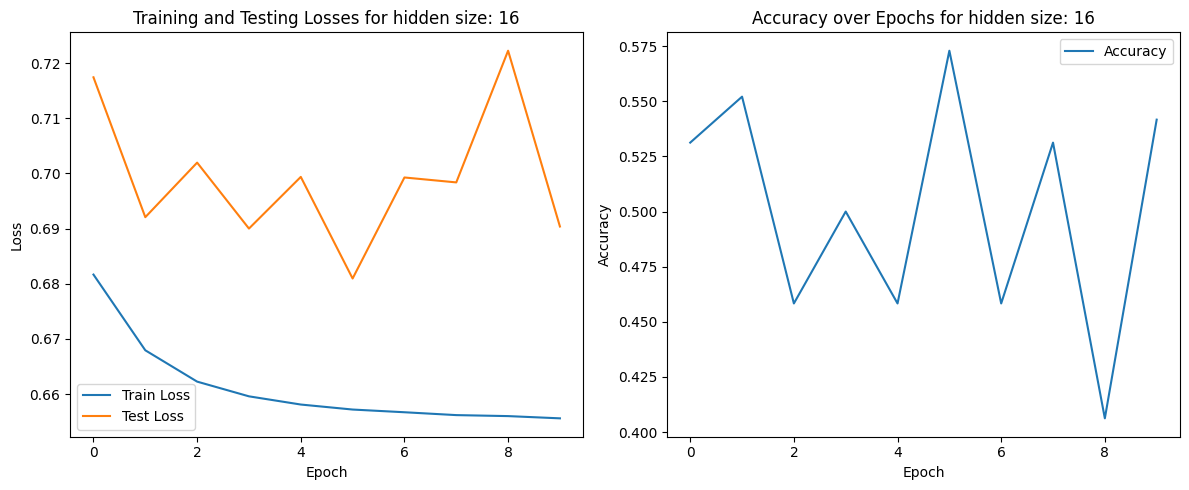

In [2]:
for hidden_size in [2, 4, 8, 16]:
    model = ExMLP(input_size, output_size, hidden_size)

    print("Using model: " + model.name())

    if reload_model:
        print("Reloading model")
        model.load_state_dict(torch.load(model.name() + ".pth"))

    model.cuda()

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train_loss = 1.0
    test_loss = 1.0

    # training steps in which a test step is executed every test_interval

    model.train()

    train_losses = []
    test_losses = []
    accuracies = []

    for epoch in range(num_epochs):

        itr = 0 # iteration counter within each epoch
        epoch_train_loss = 0
        epoch_test_loss = 0
        epoch_accuracies = []

        for labels, reviews, reviews_text in train_dataset:   # getting training batches

            # test if the model can predict allways False
            # labels = torch.arange(0, 2, dtype=torch.float32).repeat(1024,1).cuda()

            itr = itr + 1

            if (itr + 1) % test_interval == 0:
                test_iter = True
                labels, reviews, reviews_text = next(iter(test_dataset)) # get a test batch 
            else:
                test_iter = False

            # Recurrent nets (RNN/GRU)


            # Token-wise networks (MLP / MLP + Atten.) 
            
                sub_score = model(reviews)

                output = torch.mean(sub_score, 1)
                
            # cross-entropy loss

            loss = criterion(output, labels)

            # optimize in training iterations

            if not test_iter:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # averaged losses
            if test_iter:
                test_loss = 0.8 * float(loss.detach()) + 0.2 * test_loss
                epoch_test_loss += test_loss
            else:
                train_loss = 0.9 * float(loss.detach()) + 0.1 * train_loss
                epoch_train_loss += train_loss

            if test_iter:
                accuracy = accuracy_score(torch.argmax(output, dim=1).cpu(), torch.argmax(labels, dim=1).cpu())
                epoch_accuracies.append(accuracy)
                print(
                    f"Epoch [{epoch + 1}/{num_epochs}], "
                    f"Step [{itr + 1}/{len(train_dataset)}], "
                    f"Train Loss: {train_loss:.4f}, "
                    f"Test Loss: {test_loss:.4f}"
                )

                if not run_recurrent:
                    nump_subs = sub_score.cpu().detach().numpy()
                    labels = labels.cpu().detach().numpy()
                    if hidden_size >= 8:
                        print_review(reviews_text[0], nump_subs[0,:,0], nump_subs[0,:,1], labels[0,0], labels[0,1])

                # saving the model
                torch.save(model, model.name() + "_" + str(hidden_size) +".pth")

        print(f"Accuracy: {sum(epoch_accuracies) / len(epoch_accuracies)}")
        accuracies.append(sum(epoch_accuracies) / len(epoch_accuracies))    
        train_losses.append(epoch_train_loss / len(train_dataset))
        test_losses.append(epoch_test_loss / (len(train_dataset) // test_interval))


    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_losses, label='Train Loss')
    plt.plot(range(num_epochs), test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Training and Testing Losses for hidden size: {hidden_size}')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(accuracies)), accuracies, label='Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy over Epochs for hidden size: {hidden_size}')

    plt.tight_layout()
    plt.show()

In [30]:
import pandas as pd
all_reviews = pd.read_csv('IMDB Dataset.csv')

In [31]:
from loader import preprocess_review, MAX_LENGTH, tokinize

for idx, record in all_reviews.iterrows():

    review_hard_for_rnn_rep = preprocess_review(record['review']).cuda()

    mlp_model = torch.load("MLP_16.pth")

    mlp_model.eval()

    with torch.no_grad():
        sub_score = mlp_model(review_hard_for_rnn_rep)
        output = torch.mean(sub_score.squeeze(), 0)

    mlp_pred = "positive" if output[0] > output[1] else "negative"

    if mlp_pred != record['sentiment']:
        if mlp_pred == 'positive':
            print(f"MLP: {mlp_pred}, label: {record['sentiment']}, record: {record['review']}")
            nump_subs = sub_score.squeeze().cpu().detach().numpy()
            print_review(tokinize(record['review']), nump_subs[:,0], nump_subs[:,1], bool(record['sentiment'] == 'positive'), bool(record['sentiment'] == 'negative'))
            break

MLP: positive, label: negative, record: Protocol is an implausible movie whose only saving grace is that it stars Goldie Hawn along with a good cast of supporting actors. The story revolves around a ditzy cocktail waitress who becomes famous after inadvertently saving the life of an Arab dignitary. The story goes downhill halfway through the movie and Goldie's charm just doesn't save this movie. Unless you are a Goldie Hawn fan don't go out of your way to see this film.
protocol is an implausible movie whose only saving grace is that it stars goldie hawn along with good cast of supporting actors the story revolves around ditzy cocktail waitress who becomes famous after inadvertently saving the life of an arab dignitary the story goes downhill halfway through the movie and goldie charm just doesn save this movie unless you are goldie hawn fan don go out of your way to see this film
word		prediction	label
protocol		0	0
is		1	0
an		1	0
implausible		0	0
movie		0	0
whose		1	0
only		0	0
savi

In [32]:
from loader import preprocess_review, MAX_LENGTH, tokinize

for idx, record in all_reviews.iterrows():

    review_hard_for_rnn_rep = preprocess_review(record['review']).cuda()

    mlp_model = torch.load("MLP_16.pth")

    mlp_model.eval()

    with torch.no_grad():
        sub_score = mlp_model(review_hard_for_rnn_rep)
        output = torch.mean(sub_score.squeeze(), 0)

    mlp_pred = "positive" if output[0] > output[1] else "negative"

    if mlp_pred != record['sentiment']:
        if mlp_pred == 'negative':
            print(f"MLP: {mlp_pred}, label: {record['sentiment']}, record: {record['review']}")
            nump_subs = sub_score.squeeze().cpu().detach().numpy()
            print_review(tokinize(record['review']), nump_subs[:,0], nump_subs[:,1], bool(record['sentiment'] == 'positive'), bool(record['sentiment'] == 'negative'))
            break

MLP: negative, label: positive, record: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the m

In [33]:
from loader import preprocess_review, MAX_LENGTH, tokinize

for idx, record in all_reviews.iterrows():

    review_hard_for_rnn_rep = preprocess_review(record['review']).cuda()

    mlp_model = torch.load("MLP_16.pth")

    mlp_model.eval()

    with torch.no_grad():
        sub_score = mlp_model(review_hard_for_rnn_rep)
        output = torch.mean(sub_score.squeeze(), 0)

    mlp_pred = "positive" if output[0] > output[1] else "negative"

    if mlp_pred == record['sentiment']:
        if mlp_pred == 'positive':
            print(f"MLP: {mlp_pred}, label: {record['sentiment']}, record: {record['review']}")
            nump_subs = sub_score.squeeze().cpu().detach().numpy()
            print_review(tokinize(record['review']), nump_subs[:,0], nump_subs[:,1], bool(record['sentiment'] == 'positive'), bool(record['sentiment'] == 'negative'))
            break

MLP: positive, label: positive, record: A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating 

In [34]:
from loader import preprocess_review, MAX_LENGTH, tokinize

for idx, record in all_reviews.iterrows():

    review_hard_for_rnn_rep = preprocess_review(record['review']).cuda()

    mlp_model = torch.load("MLP_16.pth")

    mlp_model.eval()

    with torch.no_grad():
        sub_score = mlp_model(review_hard_for_rnn_rep)
        output = torch.mean(sub_score.squeeze(), 0)

    mlp_pred = "positive" if output[0] > output[1] else "negative"

    if mlp_pred == record['sentiment']:
        if mlp_pred == 'negative':
            print(f"MLP: {mlp_pred}, label: {record['sentiment']}, record: {record['review']}")
            nump_subs = sub_score.squeeze().cpu().detach().numpy()
            print_review(tokinize(record['review']), nump_subs[:,0], nump_subs[:,1], bool(record['sentiment'] == 'positive'), bool(record['sentiment'] == 'negative'))
            break

MLP: negative, label: negative, record: Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.
basically there a family where little boy jake thinks there a zombie in his closet his parents are fighting all the time br br this movie is slower than soap opera and suddenly jake decides to become rambo and k